In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#statistic
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from factor_analyzer import FactorAnalyzer

https://365datascience.com/tutorials/python-tutorials/predictive-model-python/

### Step 1: Get General Observation About the Dataset:

#### head, tail, info, and the summary statistic. 

In [2]:
df=pd.read_csv('/Users/candicewu/Desktop/cleaned_dataset.csv')
df

,price_log,condition,grade,floors,view,bedrooms,bathrooms_sqrt,sqft_living_log,sqft_lot_log,house_age,school_rate,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime
0,5.640978,4,9,2.0,0,3,1.500000,3.294466,4.545307,46,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
1,5.799341,3,9,2.0,0,4,1.658312,3.432969,4.571441,23,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
2,5.579646,4,7,1.0,0,3,1.581139,3.217484,4.147800,37,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
3,5.720893,5,7,1.0,0,5,1.322876,3.406540,4.856572,63,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
4,5.612784,4,8,1.0,0,3,1.500000,3.255273,4.564713,45,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20562,6.217747,3,9,1.0,0,4,1.802776,3.561101,4.131298,99,0.991565,0.022,19.8,3120.0,0.0872,45.4,174063.0,75.0
20563,6.079181,3,8,2.0,0,4,1.732051,3.332438,3.909503,70,0.991565,0.022,19.8,3120.0,0.0872,45.4,174063.0,75.0
20564,6.410777,4,10,1.0,0,5,1.732051,3.679428,4.310481,48,0.991565,0.022,19.8,3120.0,0.0872,45.4,174063.0,75.0
20565,6.352183,3,11,2.0,0,5,2.291288,3.532754,3.909449,17,0.991565,0.022,19.8,3120.0,0.0872,45.4,174063.0,75.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20567 entries, 0 to 20566
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                20567 non-null  float64
 1   condition                20567 non-null  int64  
 2   grade                    20567 non-null  int64  
 3   floors                   20567 non-null  float64
 4   view                     20567 non-null  int64  
 5   bedrooms                 20567 non-null  int64  
 6   bathrooms_sqrt           20567 non-null  float64
 7   sqft_living_log          20567 non-null  float64
 8   sqft_lot_log             20567 non-null  float64
 9   house_age                20567 non-null  int64  
 10  school_rate              20567 non-null  float64
 11  unemployment_rate        20567 non-null  float64
 12  travel_time_to_work      20567 non-null  float64
 13  total_population         20567 non-null  float64
 14  typical_levy_rate     

In [4]:
df.describe()

,price_log,condition,grade,floors,view,bedrooms,bathrooms_sqrt,sqft_living_log,sqft_lot_log,house_age,school_rate,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime
count,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000
mean,5.660924,3.411436,7.640881,1.491637,0.224729,3.364662,1.425032,3.275358,3.891261,52.473477,0.635216,0.062973,28.103763,33114.335732,0.114165,38.134730,81818.921233,19009.020129
std,0.227154,0.651841,1.160669,0.541709,0.749836,0.929516,0.269167,0.183358,0.381393,29.507719,0.178660,0.017514,3.409938,11323.200504,0.019821,3.449217,24335.663074,18320.184761
min,4.875061,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.568202,2.716003,8.000000,0.286604,0.017000,18.700000,3120.000000,0.087200,23.300000,40656.000000,46.000000
25%,5.503791,3.000000,7.000000,1.000000,0.000000,3.000000,1.224745,3.149219,3.698970,27.000000,0.528030,0.049000,26.200000,23968.000000,0.102900,36.100000,63030.000000,1747.000000
50%,5.648360,3.000000,7.000000,1.500000,0.000000,3.000000,1.500000,3.277380,3.875524,49.000000,0.534146,0.061000,28.600000,32587.000000,0.102900,37.900000,81037.000000,5795.000000
75%,5.802774,4.000000,8.000000,2.000000,0.000000,4.000000,1.581139,3.401401,4.017159,72.000000,0.817674,0.074000,30.100000,42590.000000,0.128300,40.400000,93573.000000,40649.000000
max,6.886491,5.000000,13.000000,3.500000,4.000000,33.000000,2.828427,4.131619,6.217841,123.000000,0.991565,0.112000,36.600000,62216.000000,0.160700,47.400000,182308.000000,40649.000000



#### Checking missing values and duplicates to make sure that the dataset's quality and integrity have meet.

In [5]:
df.isnull().sum()

price_log                  0
condition                  0
grade                      0
floors                     0
view                       0
bedrooms                   0
bathrooms_sqrt             0
sqft_living_log            0
sqft_lot_log               0
house_age                  0
school_rate                0
unemployment_rate          0
travel_time_to_work        0
total_population           0
typical_levy_rate          0
median_age                 0
median_household_income    0
area_crime                 0
dtype: int64

In [6]:
# find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]
duplicate_rows

,price_log,condition,grade,floors,view,bedrooms,bathrooms_sqrt,sqft_living_log,sqft_lot_log,house_age,school_rate,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime


In [7]:
# remove duplicates based on all columns
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20567 entries, 0 to 20566
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                20567 non-null  float64
 1   condition                20567 non-null  int64  
 2   grade                    20567 non-null  int64  
 3   floors                   20567 non-null  float64
 4   view                     20567 non-null  int64  
 5   bedrooms                 20567 non-null  int64  
 6   bathrooms_sqrt           20567 non-null  float64
 7   sqft_living_log          20567 non-null  float64
 8   sqft_lot_log             20567 non-null  float64
 9   house_age                20567 non-null  int64  
 10  school_rate              20567 non-null  float64
 11  unemployment_rate        20567 non-null  float64
 12  travel_time_to_work      20567 non-null  float64
 13  total_population         20567 non-null  float64
 14  typical_levy_rate     

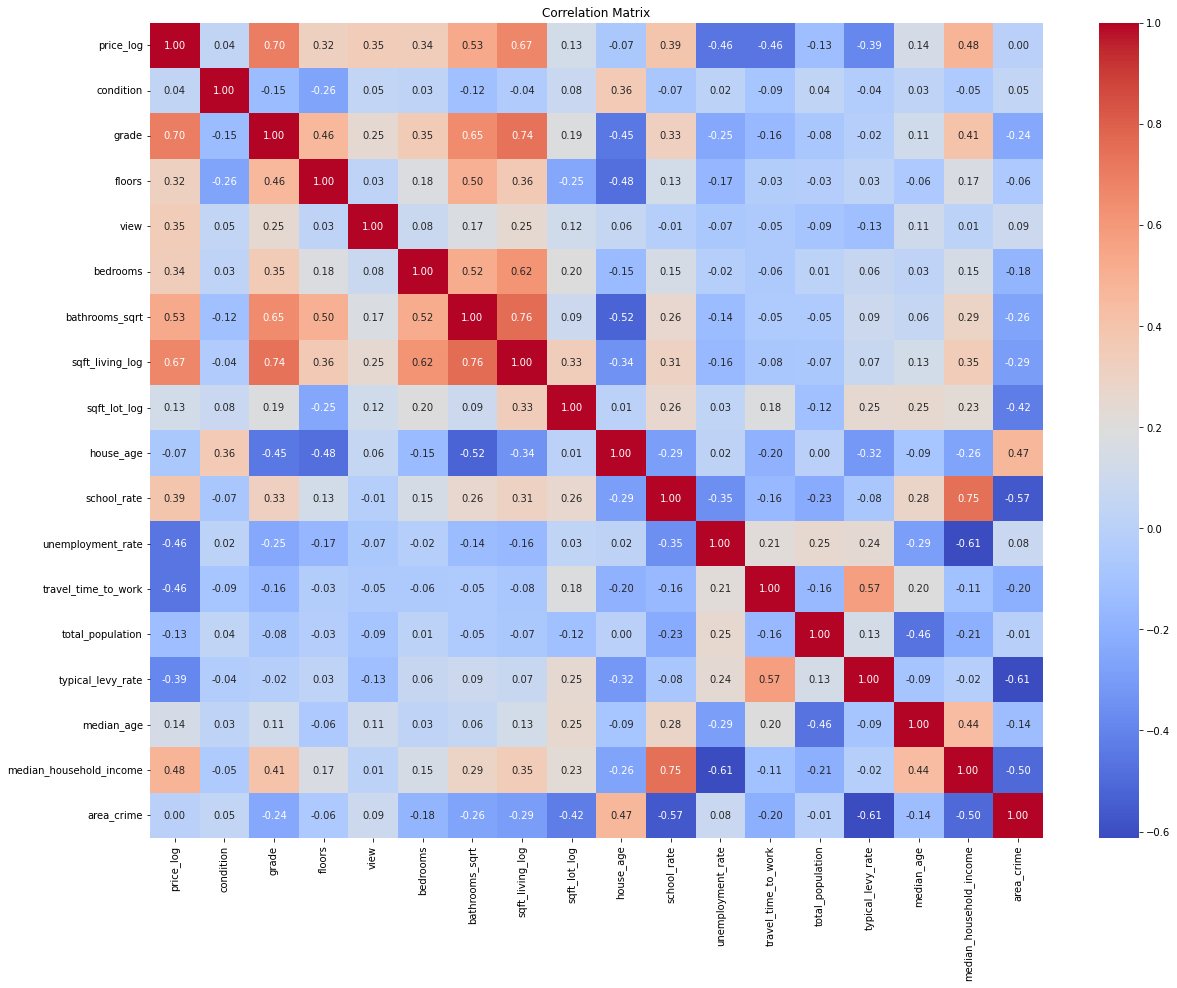

In [8]:
corr = df.corr()
# create a larger plot figure
fig, ax = plt.subplots(figsize=(20, 15))#the figsize parameter is set to (12, 10), which creates a plot figure with a width of 12 inches and a height of 10 inches.
sns.heatmap(corr, 
            cmap='coolwarm', 
            annot=True, # "annot=True" is used to add the correlation coefficient values to each cell in the heatmap
            fmt='.2f')  #fmt parameter is used to specify the format of the numeric values, '.2f' means the format of the numerica values to two decimal places.
plt.title('Correlation Matrix')
plt.show()

## Step 2: modeling


#### MLR Method


https://medium.com/codex/step-by-step-guide-to-simple-and-multiple-linear-regression-in-python-867ac9a30298

##### 1. OLS model

In [9]:
X = df[['condition','grade','floors','view', 'bedrooms', 'bathrooms_sqrt',
       'sqft_living_log', 'sqft_lot_log', 'house_age', 'school_rate',
       'unemployment_rate', 'travel_time_to_work', 'total_population',
       'typical_levy_rate', 'median_age', 'median_household_income',
       'area_crime']]
y = df['price_log']

# Add intercept term
X = sm.add_constant(X)

# Fit model
model1 = sm.OLS(y, X).fit()

# Print summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     5575.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:31:16   Log-Likelihood:                 19038.
No. Observations:               20567   AIC:                        -3.804e+04
Df Residuals:                   20549   BIC:                        -3.790e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

##### Regression Diagnostics
https://www.geeksforgeeks.org/residual-leverage-plot-regression-diagnostic/</p>
https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

/var/folders/rc/k2hbzd5x5735hz5cxlddg6x80000gn/T/ipykernel_31929/3233130365.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


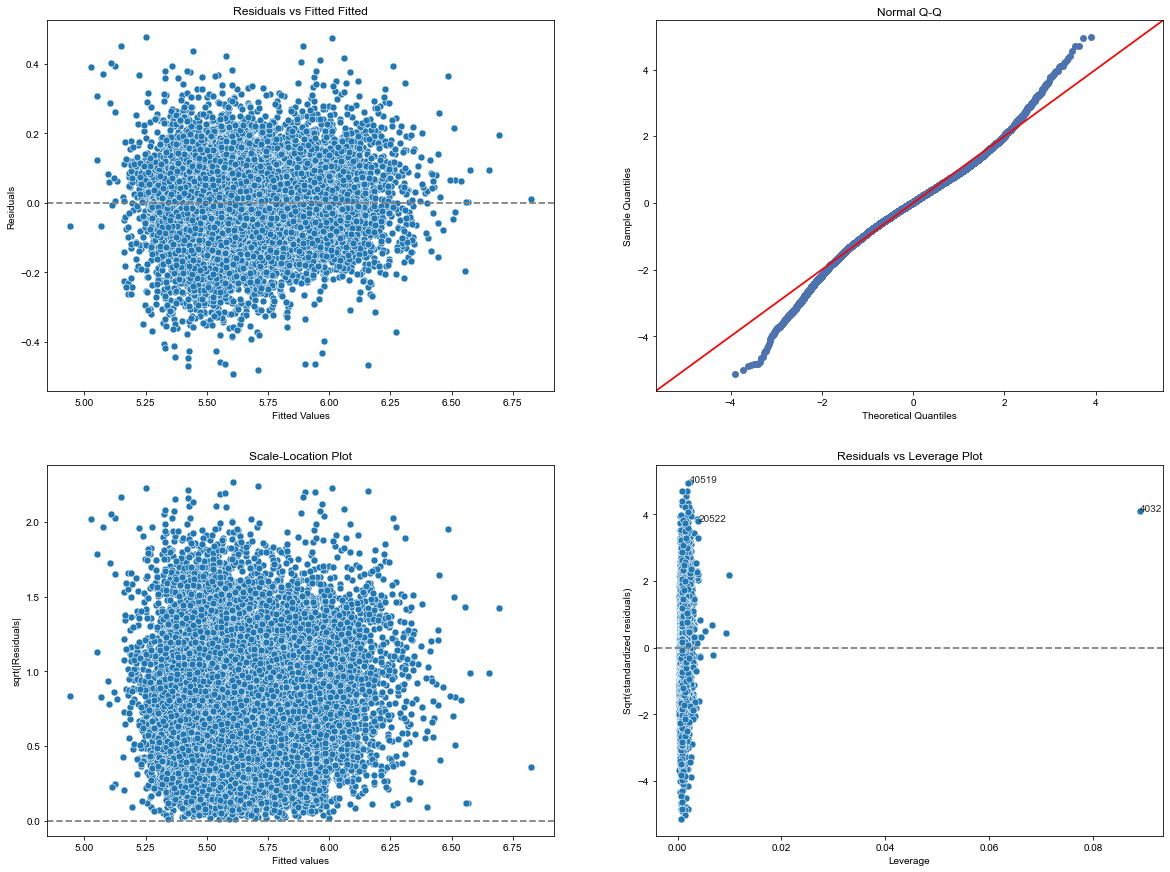

In [10]:
# Get different Variables for diagnostic
fitted_value = model1.fittedvalues #model values
residuals = model1.resid #model residuals
stand_residuals = model1.get_influence().resid_studentized_internal #standardized reisuals
stand_residuals_abs_sqrt = np.sqrt(np.abs(stand_residuals)) #absolute squared standardized residuals
abs_resid = np.abs(residuals) #absolute residuals
influence = model1.get_influence()
leverage = influence.hat_matrix_diag #leverage, from statmodels intervals
cooks_distance= model1.get_influence().cooks_distance[0]

# PLot different diagnostic plots
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2)

plt.style.use('seaborn')

# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted Fitted')

# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')

# Scale-Location Plot
#https://www.statology.org/scale-location-plot/
#A scale-location plot is a type of plot that displays the fitted values of a regression model along the x-axis and the the square root of the standardized residuals along the y-axis.
sns.scatterplot(x=fitted_value, y=stand_residuals_abs_sqrt, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('sqrt(|Residuals|')
ax[1, 0].set_title('Scale-Location Plot')

# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_residuals, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Sqrt(standardized residuals)')
ax[1, 1].set_title('Residuals vs Leverage Plot')
# annotations
leverage_top_3 = np.flip(np.argsort(cooks_distance), 0)[:3]
for i in leverage_top_3:
   ax[1, 1].annotate(i, xy=(leverage[i], stand_residuals[i]))
    
plt.show()


##### 2.Scikit-learn

/var/folders/rc/k2hbzd5x5735hz5cxlddg6x80000gn/T/ipykernel_31929/4175718276.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
/var/folders/rc/k2hbzd5x5735hz5cxlddg6x80000gn/T/ipykernel_31929/4175718276.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

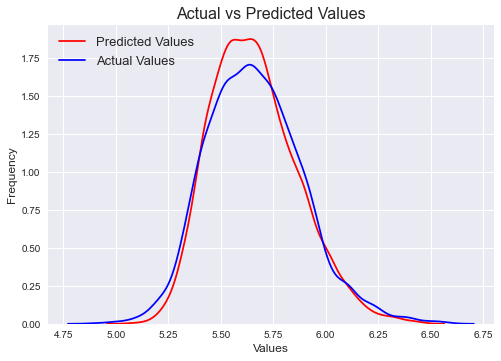

In [11]:
#check the accuracy of the MLR scikit-learn model is by constructing a distribution plot by combining the predicted values and the actual values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)

# Visualizing Prediction Accuracy
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [12]:
#https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R-Squared :', r2_score(y_test, y_pred))#https://www.rasgoml.com/feature-engineering-tutorials/how-to-calculate-r-2-with-scikit-learn

MAE:  0.07252365449979205
MSE:  0.009269307308245366
RMSE:  0.2693021620778267
R-Squared : 0.821632790659955


##### 3. model improvement
https://towardsdatascience.com/identifying-outliers-in-linear-regression-cooks-distance-9e212e9136a

In [13]:
#Determine the threshold
threshold = 4 / (len(df) - len(X.columns) - 1)
#any data point with a Cook’s Distance greater than 4/n (where n is the total number of observations) is flagged 
# as an ‘observation of interest’ that is worthy of closer scrutiny.

#Identify outliers
outlier_indices = np.where(cooks_distance > threshold)[0]

#Remove outliers
df_cleaned = df.reset_index(drop=True).drop(outlier_indices)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19269 entries, 0 to 20566
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                19269 non-null  float64
 1   condition                19269 non-null  int64  
 2   grade                    19269 non-null  int64  
 3   floors                   19269 non-null  float64
 4   view                     19269 non-null  int64  
 5   bedrooms                 19269 non-null  int64  
 6   bathrooms_sqrt           19269 non-null  float64
 7   sqft_living_log          19269 non-null  float64
 8   sqft_lot_log             19269 non-null  float64
 9   house_age                19269 non-null  int64  
 10  school_rate              19269 non-null  float64
 11  unemployment_rate        19269 non-null  float64
 12  travel_time_to_work      19269 non-null  float64
 13  total_population         19269 non-null  float64
 14  typical_levy_rate     

It’s important to note that Cook’s Distance should be used as a way to identify potentially influential observations. Just because an observation is influential doesn’t necessarily mean that it should be deleted from the dataset.</p>
Therefore, we should verify that the observation isn’t a result of a data entry error or some other odd occurrence. If it turns out to be a legit value, we can then decide if it’s appropriate to delete it, leave it be, or simply replace it with an alternative value like the median.</p>
https://www.statology.org/cooks-distance-python/#:~:text=The%20larger%20the%20value%20for,considered%20to%20be%20highly%20influential.

In [14]:
X_cleaned = df_cleaned[['condition','grade','floors','view', 'bedrooms', 'bathrooms_sqrt',
       'sqft_living_log', 'sqft_lot_log', 'house_age', 'school_rate',
       'unemployment_rate', 'travel_time_to_work', 'total_population',
       'typical_levy_rate', 'median_age', 'median_household_income',
       'area_crime']]
y_cleaned = df_cleaned['price_log']

# Add intercept term
X_cleaned = sm.add_constant(X_cleaned)

# Fit model
cleaned_model1 = sm.OLS(y_cleaned, X_cleaned).fit()

# Print summary
print(cleaned_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     7320.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:31:21   Log-Likelihood:                 22045.
No. Observations:               19269   AIC:                        -4.405e+04
Df Residuals:                   19251   BIC:                        -4.391e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [15]:
#check the accuracy of the MLR scikit-learn model is by constructing a distribution plot by combining the predicted values and the actual values
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R-Squared :', r2_score(y_test, y_pred))

MAE:  0.061616034927482785
MSE:  0.005994093806110651
RMSE:  0.24822577409987623
R-Squared : 0.8681544819066288


#### FA Method
Factor Analysis is a statistical method used to uncover underlying factors or latent variables that explain the patterns of relationships among observed variables. It helps me to reduce the complexity of the house dataset by identifying a smaller set of factors that capture the most important information or variability in the data.</p>
https://www.datacamp.com/tutorial/introduction-factor-analysis

##### 1. check for multicollinearity

In [16]:
# Separate independent variables (X) and dependent variable (y)
X = df[['condition','grade','floors','view', 'bedrooms', 'bathrooms_sqrt',
       'sqft_living_log', 'sqft_lot_log', 'house_age', 'school_rate',
       'unemployment_rate', 'travel_time_to_work', 'total_population',
       'typical_levy_rate', 'median_age', 'median_household_income',
       'area_crime']]
y = df['price_log']  # Corrected column name to 'price_log'

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                   Variable          VIF
0                     const  1215.183413
1                 condition     1.216574
2                     grade     3.023287
3                    floors     1.870897
4                      view     1.176010
5                  bedrooms     1.774247
6            bathrooms_sqrt     3.245362
7           sqft_living_log     4.642382
8              sqft_lot_log     1.842945
9                 house_age     2.553781
10              school_rate     3.719605
11        unemployment_rate     2.010195
12      travel_time_to_work     2.093967
13         total_population     1.461464
14        typical_levy_rate     4.007353
15               median_age     1.851472
16  median_household_income     4.364401
17               area_crime     5.029376


https://www.statisticshowto.com/variance-inflation-factor/</p>
A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.</p>
Between 1 and 5 = moderately correlated.</p>
Greater than 5 = highly correlated.</p>
Greater than 10 =  is cause for concern

##### 2. Adequacy Test

In [17]:
#evaluate the " factorability" of the dataset by using Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
factors=df[[ 'condition','grade','floors','view', 'bedrooms', 'bathrooms_sqrt',
       'sqft_living_log', 'sqft_lot_log', 'house_age', 'school_rate',
       'unemployment_rate', 'travel_time_to_work', 'total_population',
       'typical_levy_rate', 'median_age', 'median_household_income',
       'area_crime']]
chi_square_value,p_value=calculate_bartlett_sphericity(factors)
chi_square_value, p_value

(180477.07967332596, 0.0)

The null hypothesis for Bartlett’s test is: H0:matrix=identity </p>
According to the output above, the p-value is lass than 0.05, which means the test was statistically significant. We reject the null hypethesis, indicating that the variables in the dataset are esssentially uncorrelated.

##### 3. Choosing the Number of Factors

In [18]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=17, rotation=None)
fa.fit(factors)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.46368841, 2.29988803, 2.18099305, 1.61196809, 1.34511027,
       0.87802063, 0.81550382, 0.6217985 , 0.54736064, 0.53873215,
       0.3959318 , 0.33029742, 0.29856895, 0.27099346, 0.15612523,
       0.14197002, 0.10304952])

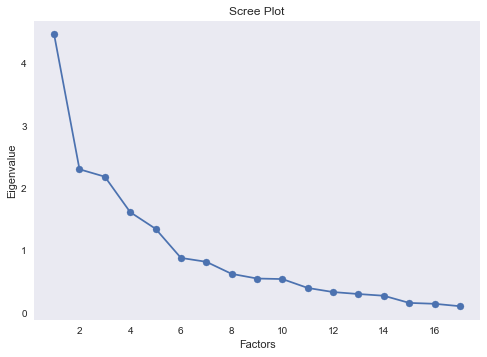

In [19]:
# Create scree plot using matplotlib
plt.scatter(range(1,factors.shape[1]+1),ev)
plt.plot(range(1,factors.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


Here, we can see only for 5-factors eigenvalues are greater than one. It means we need to choose only 5 factors (or unobserved variables).

##### 4. Performing Factor Analysis
https://www.theanalysisfactor.com/factor-analysis-5/

In [20]:
# Create factor analyzer object
fa = FactorAnalyzer(n_factors=5)

# Fit the factor analysis model to your data
fa.fit(factors)

# Obtain factor loadings
factor_loadings = fa.loadings_

# create labers for columns and rows
factor_labels = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5']
factors_columns=[['condition','grade','floors','view', 'bedrooms', 'bathrooms_sqrt',
       'sqft_living_log', 'sqft_lot_log', 'house_age', 'school_rate',
       'unemployment_rate', 'travel_time_to_work', 'total_population',
       'typical_levy_rate', 'median_age', 'median_household_income',
       'area_crime']]

# Create a DataFrame with factor loading values, factor labels, and variable names
factor_loading_table = pd.DataFrame(factor_loadings, columns=factor_labels, index=factors_columns)
factor_loading_table

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
condition,0.049821,0.002315,-0.062035,0.410914,-0.046134
grade,0.645325,0.161139,-0.082520,-0.261733,-0.002073
floors,0.258444,-0.022148,-0.093467,-0.680926,-0.027601
view,0.321747,-0.119351,-0.108074,0.082299,0.137766
bedrooms,0.627645,-0.025238,0.047540,0.058405,-0.110063
bathrooms_sqrt,0.728630,0.010374,0.030952,-0.347998,-0.051181
sqft_living_log,0.972347,0.024502,0.039716,-0.024401,-0.028595
sqft_lot_log,0.294896,0.177557,0.383652,0.434312,0.133029
house_age,-0.146791,-0.141733,-0.339947,0.654192,0.004778
school_rate,-0.000784,0.805917,-0.021656,0.020039,0.055928


In [21]:
# Create factor analyzer object
fa = FactorAnalyzer(n_factors=5)

# Fit the factor analysis model to your data
fa.fit(factors)

# Get variance of each factor
factor_variance = fa.get_factor_variance()

# create labers for columns and rows
factor_labels = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5']
variance_labers=[['SS', 'Proportion Var','Cumulative Var']]

# Create a DataFrame with factor loading values, factor labels, and variable names
factor_variance_table = pd.DataFrame(factor_variance, columns=factor_labels, index=variance_labers)
factor_variance_table

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
SS,2.589088,2.377774,2.069620,1.513310,1.233985
Proportion Var,0.152299,0.139869,0.121742,0.089018,0.072587
Cumulative Var,0.152299,0.292168,0.413911,0.502929,0.575516


The factor loadings of sqft_living_log and typical_levy_rate do not reach a minimum threshold of |0.4| in all three factors. Therefore, we need to eliminate these variables

#### Random Forest

https://towardsdatascience.com/4-ways-to-visualize-individual-decision-trees-in-a-random-forest-7a9beda1d1b7

In [22]:
# X = df[['condition', 'grade', 'floors', 'view', 'bedrooms', 'bathrooms_sqrt',
#        'sqft_living_log', 'sqft_lot_log', 'house_age', 'school_rate',
#        'unemployment_rate', 'travel_time_to_work', 'total_population',
#        'typical_levy_rate', 'median_age', 'median_household_income',
#        'area_crime']]
# y =df['price_log']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Define the model
# rf_model = RandomForestRegressor()

# # Fit the model on the training data
# rf_model.fit(X_train, y_train)

# # Visualize the first decision tree
# plt.figure(figsize=(20, 18))
# plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, fontsize=8)
# plt.show()
